<a href="https://colab.research.google.com/github/Jerinjosea/CartPole-using-different-methods/blob/master/sudoku_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/wichtounet/sudoku_dataset.git

Cloning into 'sudoku_dataset'...
remote: Enumerating objects: 1580, done.
remote: Total 1580 (delta 0), reused 0 (delta 0), pack-reused 1580
Receiving objects: 100% (1580/1580), 494.05 MiB | 38.56 MiB/s, done.
Resolving deltas: 100% (431/431), done.
Checking out files: 100% (1021/1021), done.


In [13]:
from PIL import Image, ImageOps
import numpy as np
import os
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB6,InceptionV3, VGG16, MobileNetV3Small

#Preprocessing

In [3]:
labels = pd.read_csv("/content/sudoku_dataset/outlines_sorted.csv")
labels['filepath']=labels['filepath'].astype('string')
labels.sample(10)

,filepath,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y
0,./images/image32.jpg,112,35,583,35,600,435,105,444
158,./images/image69.jpg,136,8,601,4,600,462,146,467
140,./images/image1003.jpg,42,359,876,346,883,1131,53,1140
173,./images/image1088.jpg,50,267,875,261,894,1104,35,1114
109,./images/image1055.jpg,104,130,803,135,824,820,94,819
6,./images/image1005.jpg,52,442,791,441,792,1155,58,1177
87,./images/image134.jpg,20,32,508,27,521,442,16,455
183,./images/image17.jpg,127,2,545,8,556,441,123,449
54,./images/image168.jpg,93,10,536,17,535,461,84,459
131,./images/image129.jpg,25,10,404,1,415,400,14,407


In [49]:
x = []
y = []
new_size = (300,200)

general_path = "/content/sudoku_dataset"

for i in range(len(labels)):
  #images
  img = Image.open(general_path+(labels.iloc[i]['filepath']).replace("./","/"))
  orginal_size=img.size
  resized = img.resize(new_size)
  img = ImageOps.grayscale(resized)
  img = (np.array(img))/255
  img_test=img
  img = np.expand_dims(img, axis=2)
  x.append(img)

  #labels
  cordinates = []
  
  cordinates.append(labels.iloc[i]['p1_x']*new_size[0]/orginal_size[0])
  cordinates.append(labels.iloc[i]['p1_y']*new_size[1]/orginal_size[1])
  cordinates.append(labels.iloc[i]['p2_x']*new_size[0]/orginal_size[0])
  cordinates.append(labels.iloc[i]['p2_y']*new_size[1]/orginal_size[1])
  cordinates.append(labels.iloc[i]['p3_x']*new_size[0]/orginal_size[0])
  cordinates.append(labels.iloc[i]['p3_y']*new_size[1]/orginal_size[1])
  cordinates.append(labels.iloc[i]['p4_x']*new_size[0]/orginal_size[0])
  cordinates.append(labels.iloc[i]['p4_y']*new_size[1]/orginal_size[1])
  y.append(cordinates)

[48.125,
 51.73383317713215,
 255.0,
 49.671977507029055,
 261.25,
 185.75445173383318,
 46.5625,
 188.56607310215557]

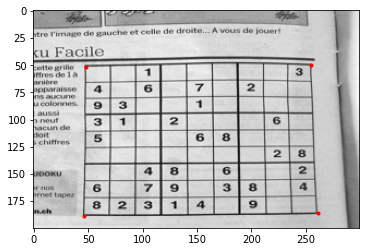

In [50]:
plt.plot(cordinates[0],cordinates[1],marker='.', color="red")
plt.plot(cordinates[2],cordinates[3],marker='.', color="red")
plt.plot(cordinates[4],cordinates[5],marker='.', color="red")
plt.plot(cordinates[6],cordinates[7],marker='.', color="red")
plt.imshow(img_test,cmap='gray')
plt.show
cordinates

In [51]:
train_imgs = np.array(x[:160])
print(train_imgs.shape)
test_imgs = np.array(x[160:])
print(test_imgs.shape)

train_y = np.array(y[:160])/300
print(train_y.shape)
test_y = np.array(y[160:])/300
print(test_y.shape)

(160, 200, 300, 1)
(42, 200, 300, 1)
(160, 8)
(42, 8)


array([[0.2109375 , 0.05972222, 0.8125    , 0.06944444, 0.8078125 ,
        0.60833333, 0.1875    , 0.60833333],
       [0.10208333, 0.11458333, 0.953125  , 0.11354167, 0.96145833,
        0.54166667, 0.090625  , 0.55260417],
       [0.103125  , 0.1453125 , 0.96770833, 0.1359375 , 0.96041667,
        0.60885417, 0.08541667, 0.61510417],
       [0.15208333, 0.13697917, 0.88020833, 0.13229167, 0.909375  ,
        0.53072917, 0.15208333, 0.53125   ],
       [0.05104167, 0.12447917, 0.95104167, 0.1203125 , 0.971875  ,
        0.57083333, 0.05208333, 0.5875    ],
       [0.1859375 , 0.00416667, 0.9640625 , 0.01111111, 0.978125  ,
        0.58888889, 0.18125   , 0.58888889],
       [0.1640625 , 0.00138889, 0.8453125 , 0.00972222, 0.8515625 ,
        0.60555556, 0.1609375 , 0.6125    ],
       [0.1625    , 0.07361111, 0.8109375 , 0.05972222, 0.809375  ,
        0.59861111, 0.175     , 0.60833333],
       [0.11666667, 0.153125  , 0.89166667, 0.146875  , 0.93854167,
        0.54375   , 0.107291

#Model and Training

Model from yolo
https://www.kaggle.com/mattbast/object-detection-tensorflow-end-to-end

In [53]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(200, 300, 1)))
optimizer = Adam(lr=1e-4)

backbone = EfficientNetB6(include_top=False,
                         weights=None,
                         input_shape=(200,300,1),
                         pooling='avg')

model.add(Dense(8, activation='relu'))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(5,5),strides = (1, 1),activation='relu', input_shape=(200,300,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(loss='mse',
             optimizer=optimizer,
             metrics=["accuracy"])



In [54]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 196, 296, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 146, 64)       18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 71, 128)       73856     
_________________________________________________________________
dropout_10 (Dropout)         (None, 46, 71, 128)     

In [55]:
history = model.fit(train_imgs, train_y, epochs=50, batch_size=32,
                    validation_data=(test_imgs, test_y))

Epoch 1/50
5/5 [==============================] - 24s 5s/step - loss: 0.1593 - accuracy: 0.2576 - val_loss: 0.1248 - val_accuracy: 0.7619
Epoch 2/50
5/5 [==============================] - 23s 5s/step - loss: 0.1357 - accuracy: 0.4992 - val_loss: 0.1251 - val_accuracy: 0.2381
Epoch 3/50
5/5 [==============================] - 23s 5s/step - loss: 0.1323 - accuracy: 0.3839 - val_loss: 0.1318 - val_accuracy: 0.7619
Epoch 4/50
5/5 [==============================] - 22s 5s/step - loss: 0.1285 - accuracy: 0.5747 - val_loss: 0.1270 - val_accuracy: 0.2381
Epoch 5/50
5/5 [==============================] - 22s 5s/step - loss: 0.1295 - accuracy: 0.3934 - val_loss: 0.1219 - val_accuracy: 0.7143
Epoch 6/50
5/5 [==============================] - 22s 5s/step - loss: 0.1244 - accuracy: 0.5966 - val_loss: 0.1216 - val_accuracy: 0.7619
Epoch 7/50
5/5 [==============================] - 23s 5s/step - loss: 0.1235 - accuracy: 0.4556 - val_loss: 0.1236 - val_accuracy: 0.2381
Epoch 8/50
5/5 [==================

In [56]:
model.predict(test_imgs)

array([[2.02785656e-02, 1.52198458e-02, 3.30237538e-01, 1.08210091e-02,
        3.48882645e-01, 1.16238549e-01, 1.07845133e-02, 1.47537425e-01],
       [3.19233118e-03, 1.90628530e-03, 4.09180909e-01, 1.12044101e-03,
        4.43456322e-01, 5.51043302e-02, 1.12389016e-03, 8.49154964e-02],
       [1.40866882e-03, 8.02076713e-04, 4.27801788e-01, 4.37768700e-04,
        4.69234884e-01, 3.65497656e-02, 4.39036754e-04, 6.33259341e-02],
       [3.02708079e-03, 1.89283420e-03, 4.04138178e-01, 1.05424551e-03,
        4.38198298e-01, 5.90234362e-02, 1.04607071e-03, 9.16198343e-02],
       [3.88030591e-03, 2.41798931e-03, 3.96908730e-01, 1.37309008e-03,
        4.28072542e-01, 6.62781075e-02, 1.38688821e-03, 9.96823162e-02],
       [1.19212223e-02, 9.58275422e-03, 3.15290034e-01, 5.04721189e-03,
        3.41398150e-01, 1.38591349e-01, 4.98906197e-03, 1.73180252e-01],
       [1.02753565e-02, 7.91426282e-03, 3.30559134e-01, 4.27083345e-03,
        3.56712550e-01, 1.25010878e-01, 4.22694208e-03, 1.

#Prooving Grounds

In [ ]:
sudoku = np.zeros(810,bool)
su_info = open("/content/sudoku_dataset/images/"+"image126.dat")
su_info.readline()
su_info.readline()
print(i)
for i in range(9):
  lines = su_info.readline()
  lines = lines.split(' ')
  for j in range(9):
    print(i*90+j*10+int(lines[j]))
    sudoku[i*90+j*10+int(lines[j])]=1

False
6
10
21
30
48
55
60
70
84
90
100
110
123
130
140
150
160
170
180
198
209
210
220
230
240
252
260
270
281
290
300
310
320
330
340
350
367
370
382
390
405
418
420
430
449
450
460
470
484
496
500
511
520
530
540
555
560
570
582
590
606
610
620
630
640
650
660
670
680
693
704
710
720
730
747
759
760
770
780
798
800


In [ ]:
for i,j in zip(sudoku,range(810)):
  if(j%10==0):
    print("\n")
  print(i,end='')



FalseFalseFalseFalseFalseFalseTrueFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

FalseTrueFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

FalseFalseFalseFalseFalseFalseFalseFalseTrueFalse

FalseFalseFalseFalseFalseTrueFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

FalseFalseFalseFalseTrueFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

FalseFalseFalseTrueFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

TrueFalseFalseFalseFalseFalseFalseFalseFalseFalse

FalseFalseFalseFalseFalseFals